In [2]:
%pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-image] [scikit-image]
Note: you may need to restart the kernel to use updated packages.


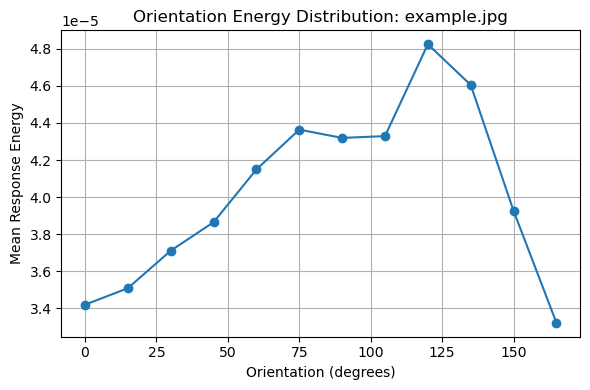

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
import os

# === 1. 载入本地图像 ===
# 替换为你的图片路径，例如 "../figures/example.jpg" 或 "C:/Users/you/Desktop/test.png"
image_path = "../figures/example.jpg"

if not os.path.exists(image_path):
    raise FileNotFoundError(f"找不到图像文件：{image_path}")

image = io.imread(image_path)

# 若为彩色图像则转换为灰度
if image.ndim == 3:
    image = color.rgb2gray(image)

# 归一化到 [0,1]
image = image.astype(float)
image = image / np.max(image)

# === 2. 定义取向集合 ===
orientations = np.linspace(0, np.pi, 12, endpoint=False)  # 12个方向

responses = []

# === 3. 对每个方向应用 Gabor filter ===
for theta in orientations:
    real, imag = filters.gabor(image, frequency=0.2, theta=theta)
    energy = np.mean(real**2 + imag**2)
    responses.append(energy)

responses = np.array(responses)

# === 4. 绘制方向能量分布曲线 ===
plt.figure(figsize=(6,4))
plt.plot(orientations * 180 / np.pi, responses, '-o')
plt.title(f'Orientation Energy Distribution: {os.path.basename(image_path)}')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Mean Response Energy')
plt.grid(True)
plt.tight_layout()
plt.show()